In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Scikit-learn is probably the most useful library for machine learning in Python.
# The sklearn library contains a lot of efficient tools for machine learning and statistical modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load data
df = pd.read_csv('./student_scores.csv')
print(df.head())
print(df.shape)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(25, 2)


Define model by ourself

In [3]:
def linear_formula(m_x, m_slope, m_intercept):
    return m_slope * m_x + m_intercept

In [10]:
# Statistical Functions to find out the values
'''
slope: float
    Slope of the regression line.

intercept: float
    Intercept of the regression line.

rvalue: float
    The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.

pvalue: float
    The p-value for a hypothesis test whose null hypothesis is that the slope is zero,
    using Wald Test with t-distribution of the test statistic. See alternative above for alternative hypotheses.

stderr: float
    Standard error of the estimated slope (gradient), under the assumption of residual normality.

'''

slope, intercept, correlation_coefficient, pvalue, standard_error = stats.linregress(df["Hours"], df["Scores"])


In [6]:
print("Values from stats module")
print("Slope: ", slope)
print("Intercept: ", intercept)
print("Correlation Coefficient: ", correlation_coefficient)

Values from stats module
Slope:  9.775803390787473
Intercept:  2.4836734053731817
Correlation Coefficient:  0.9761906560220887


In [12]:
# The map() function executes a specified function for each item in an iterable.
# The item is sent to the function as a parameter.
# A lambda function is a small anonymous function.
plot_line = list(map(lambda x: linear_formula(x, slope, intercept), df["Hours"]))

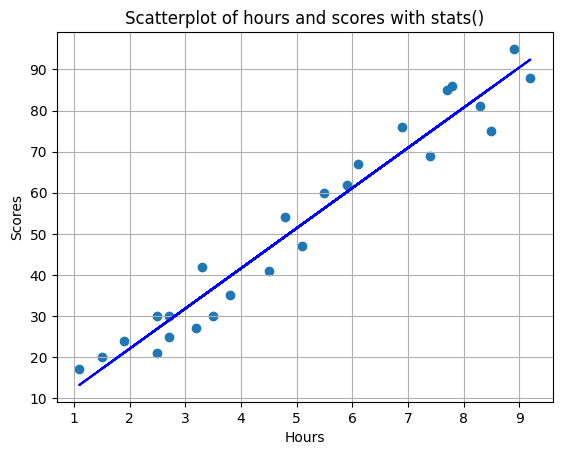

In [13]:
plt.scatter(df["Hours"], df["Scores"])
plt.plot(df["Hours"], plot_line, 'b')
plt.grid()
plt.title('Scatterplot of hours and scores with stats()')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [11]:
# 6.5 hours
myModel_predicted = linear_formula(6.5, slope, intercept)
print("My Model Predicted Value: ", myModel_predicted)

My Model Predicted Value:  66.02639544549176


In [15]:
# Scikit-Learn's linear regression model expects a 2D input,
# Dataframe offering a 1D array if we just extract the values
'''
# reshape(-1) is a line vector, when reshape(-1,1) is a column:
>>> a
array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])
>>> a.shape
(2, 3)
>>> a.reshape(-1)
array([ 1.,  2.,  3.,  4.,  5.,  6.])
>>> a.reshape(-1,1)
array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.]])
'''
X = df['Hours'].values.reshape(-1, 1)
Y = df['Scores'].values.reshape(-1, 1)
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [16]:
#  0.2, meaning 20% of the data will be used for the test set, and the remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [17]:
print("Values from sklearn module")
print("Slope: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)
print("Correlation Coefficient: ")
print(df.corr())

Values from sklearn module
Slope:  [[9.47095544]]
Intercept:  [4.39786805]
Correlation Coefficient: 
           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


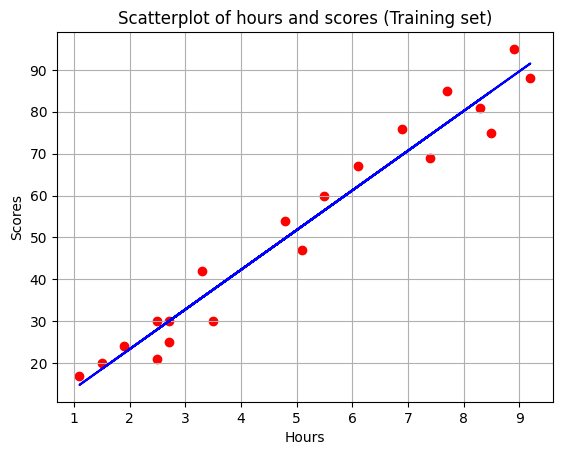

In [18]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')

plt.grid()
plt.title('Scatterplot of hours and scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [20]:
score = regressor.predict([[6.5]])
print("LinearRegression() Model Predicted Value: ", score)


LinearRegression() Model Predicted Value:  [[65.95907838]]


In [21]:
y_pred = regressor.predict(x_test)

df_preds = pd.DataFrame({'x test': x_test.squeeze(), 'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   x test  Actual  Predicted
0     4.5      41  47.017168
1     5.9      62  60.276505
2     3.8      35  40.387499
3     7.8      86  78.271320
4     3.2      27  34.704925
